**Exploratory Data Analysis**

Clinical Data

**Data Overview**

In [ ]:
import pandas as pd

clinical_path = "BPD-Neo-clinical_data.xlsx"
clinical = pd.read_excel(clinical_path)

print("Shape:", clinical.shape)
clinical.head()


Shape: (40, 8)


,ID,Weight (g),Length (cm),Sex,BW (grams),GA (weeks),PMA at Study (weeks),Jensen 2019 BPD Definition
0,BPD-Neo-01,3275,48.0,M,2030,32.42857142857143,38.42857142857143,N/A (preterm >32w)
1,BPD-Neo-02,3718,51.0,M,1010,24.714285714285715,38.42857142857143,Grade I
2,BPD-Neo-03,2890,48.5,F,890,28,40,Grade II
3,BPD-Neo-04,3203,50.5,F,3110,38.57142857142857,39.714285714285715,N/A (term)
4,BPD-Neo-05,3975,51.0,F,630,29,47.857142857142854,Grade II


**Summary Statistics**

In [ ]:
clinical.describe(include='all')


,ID,Weight (g),Length (cm),Sex,BW (grams),GA (weeks),PMA at Study (weeks),Jensen 2019 BPD Definition
count,40,40.000000,40.000000,40,40.00000,40,40,36
unique,40,NaN,NaN,2,NaN,25,30,5
top,BPD-Neo-01,NaN,NaN,F,NaN,24.428571428571427,38.42857142857143,Grade II
freq,1,NaN,NaN,22,NaN,3,4,22
mean,NaN,3402.325000,49.775000,NaN,996.62500,NaN,NaN,NaN
std,NaN,913.568697,4.364704,NaN,537.44217,NaN,NaN,NaN
min,NaN,2145.000000,43.000000,NaN,550.00000,NaN,NaN,NaN
25%,NaN,2863.250000,47.000000,NaN,710.00000,NaN,NaN,NaN
50%,NaN,3343.500000,49.250000,NaN,862.50000,NaN,NaN,NaN
75%,NaN,3674.500000,51.625000,NaN,972.50000,NaN,NaN,NaN


**Missing Values**

In [ ]:
clinical.isna().sum()


,0
ID,0
Weight (g),0
Length (cm),0
Sex,0
BW (grams),0
GA (weeks),0
PMA at Study (weeks),0
Jensen 2019 BPD Definition,4


**Distribution Plots**

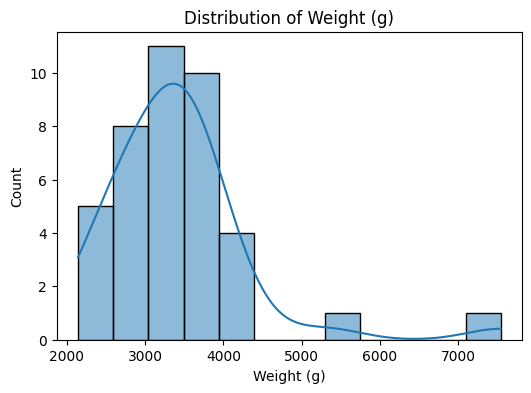

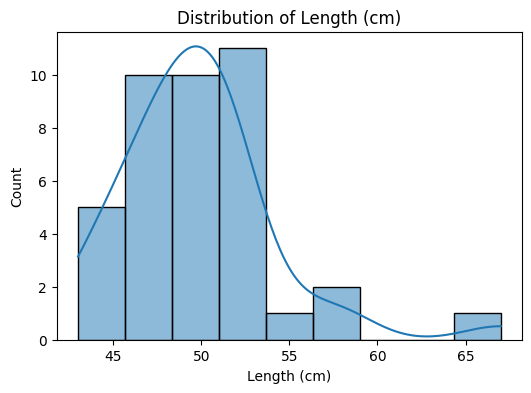

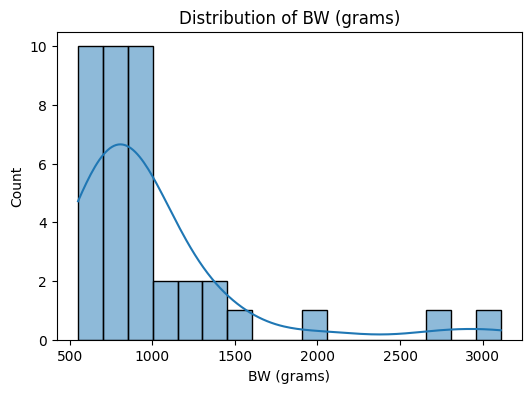

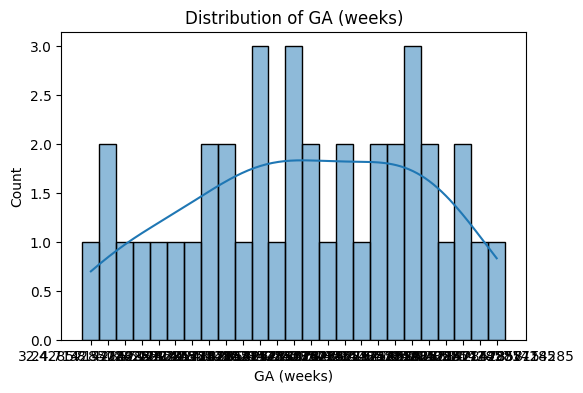

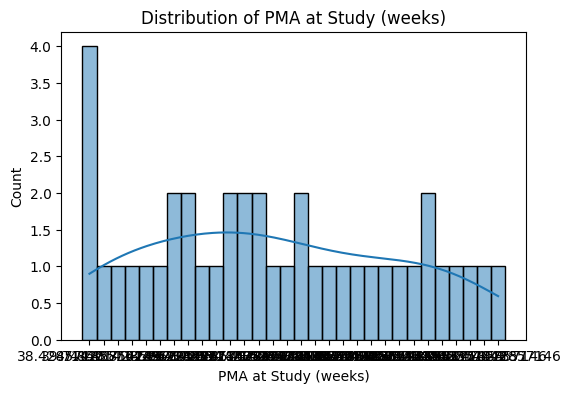

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Weight (g)', 'Length (cm)', 'BW (grams)', 'GA (weeks)', 'PMA at Study (weeks)']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(clinical[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


**Correlation Heatmap**

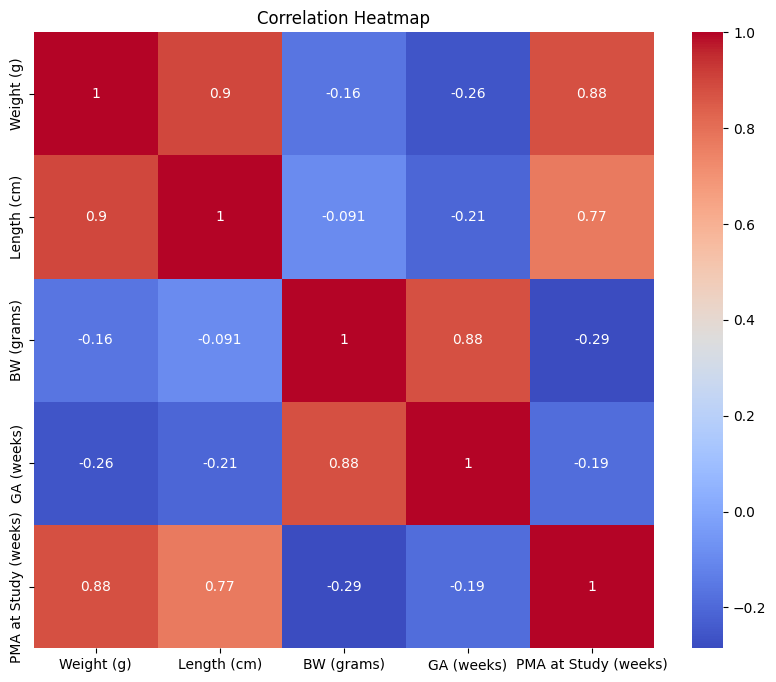

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(clinical[num_cols].corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

**Target Variable Distribution**

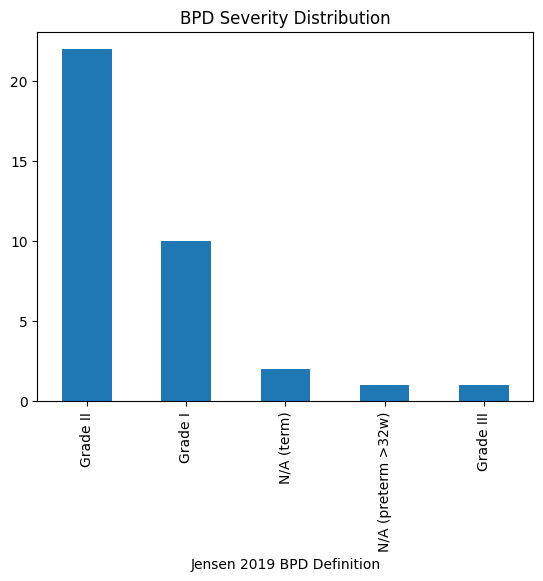

In [ ]:
clinical["Jensen 2019 BPD Definition"].value_counts().plot(kind='bar')
plt.title("BPD Severity Distribution")
plt.show()


In [ ]:
import pandas as pd

clinical = pd.read_excel("/content/BPD-Neo-clinical_data.xlsx")

label_map = {"Grade I":0, "Grade II":1, "Grade III":1}
clinical["BPD_bin"] = clinical["Jensen 2019 BPD Definition"].map(label_map)

clinical = clinical[~clinical["BPD_bin"].isna()].copy()

X = clinical.drop(["Jensen 2019 BPD Definition", "BPD_bin", "ID"], axis=1)
y = clinical["BPD_bin"]

print("Before augmentation:", X.shape, y.value_counts())


Before augmentation: (33, 6) BPD_bin
1.0    23
0.0    10
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE, SMOTENC

categorical_features = [X.columns.get_loc("Sex")]

smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_res, y_res = smote_nc.fit_resample(X, y)

print("After SMOTE-NC:", X_res.shape)
print(pd.Series(y_res).value_counts())


After SMOTE-NC: (46, 6)
BPD_bin
0.0    23
1.0    23
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_res_encoded = pd.get_dummies(X_res, columns=['Sex'], drop_first=True, dtype=float)

X_res_scaled = scaler.fit_transform(X_res_encoded)

In [ ]:
clinical_augmented = pd.DataFrame(X_res_scaled, columns=X.columns)
clinical_augmented["BPD_bin"] = y_res

clinical_augmented.to_csv("clinical_augmented.csv", index=False)


Before augmentation:
clean_label
1.0    23
0.0    10
Name: count, dtype: int64

After augmentation:
clean_label
0.0    23
1.0    23
Name: count, dtype: int64


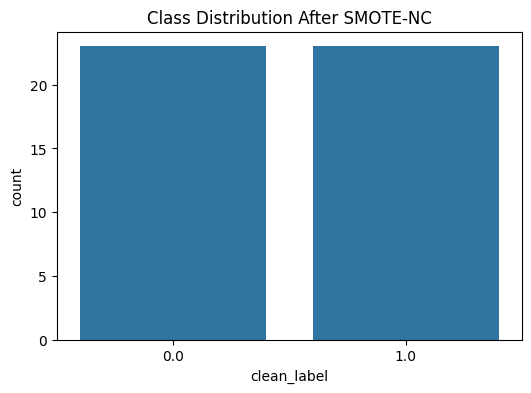

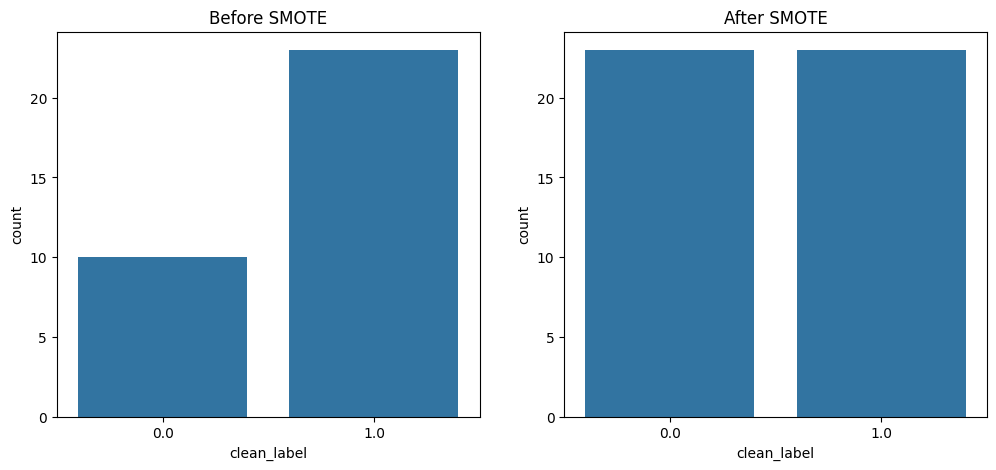


Augmented dataset saved to /content/clinical_augmented.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC

clinical = pd.read_excel("BPD-Neo-clinical_data.xlsx")

label_map = {"Grade I":0, "Grade II":1, "Grade III":1}
clinical["clean_label"] = clinical["Jensen 2019 BPD Definition"].map(label_map)

clinical_clean = clinical.dropna(subset=["clean_label"]).copy()

print("Before augmentation:")
print(clinical_clean["clean_label"].value_counts())

X = clinical_clean.drop(["clean_label", "Jensen 2019 BPD Definition", "ID"], axis=1)
y = clinical_clean["clean_label"]

categorical_features = [X.columns.get_loc("Sex")]

smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_res, y_res = smote_nc.fit_resample(X, y)

print("\nAfter augmentation:")
print(pd.Series(y_res).value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=y_res)
plt.title("Class Distribution After SMOTE-NC")
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=y)
plt.title("Before SMOTE")

plt.subplot(1,2,2)
sns.countplot(x=y_res)
plt.title("After SMOTE")

plt.show()

aug_df = pd.DataFrame(X_res, columns=X.columns)
aug_df["clean_label"] = y_res
aug_df.to_csv("/content/clinical_augmented.csv", index=False)

print("\nAugmented dataset saved to /content/clinical_augmented.csv")


In [ ]:
import pandas as pd

clinical = pd.read_excel("BPD-Neo-clinical_data.xlsx")

label_map = {"Grade I":0, "Grade II":1, "Grade III":1}
clinical["clean_label"] = clinical["Jensen 2019 BPD Definition"].map(label_map)

clinical_clean = clinical.dropna(subset=["clean_label"]).copy()

clinical_clean.head()


,ID,Weight (g),Length (cm),Sex,BW (grams),GA (weeks),PMA at Study (weeks),Jensen 2019 BPD Definition,clean_label
1,BPD-Neo-02,3718,51.0,M,1010,24.714285714285715,38.42857142857143,Grade I,0.0
2,BPD-Neo-03,2890,48.5,F,890,28,40,Grade II,1.0
4,BPD-Neo-05,3975,51.0,F,630,29,47.857142857142854,Grade II,1.0
6,BPD-Neo-07,3952,52.0,F,550,28.428571428571427,49,Grade II,1.0
7,BPD-Neo-08,3505,49.0,F,610,25.428571428571427,42,Grade II,1.0


In [ ]:
num_cols = clinical_clean.select_dtypes(include=['float64','int64']).columns
num_cols = [c for c in num_cols if c not in ["clean_label"]]

clinical_num = clinical_clean[num_cols]

clinical_num.head()


,Weight (g),Length (cm),BW (grams)
1,3718,51.0,1010
2,2890,48.5,890
4,3975,51.0,630
6,3952,52.0,550
7,3505,49.0,610


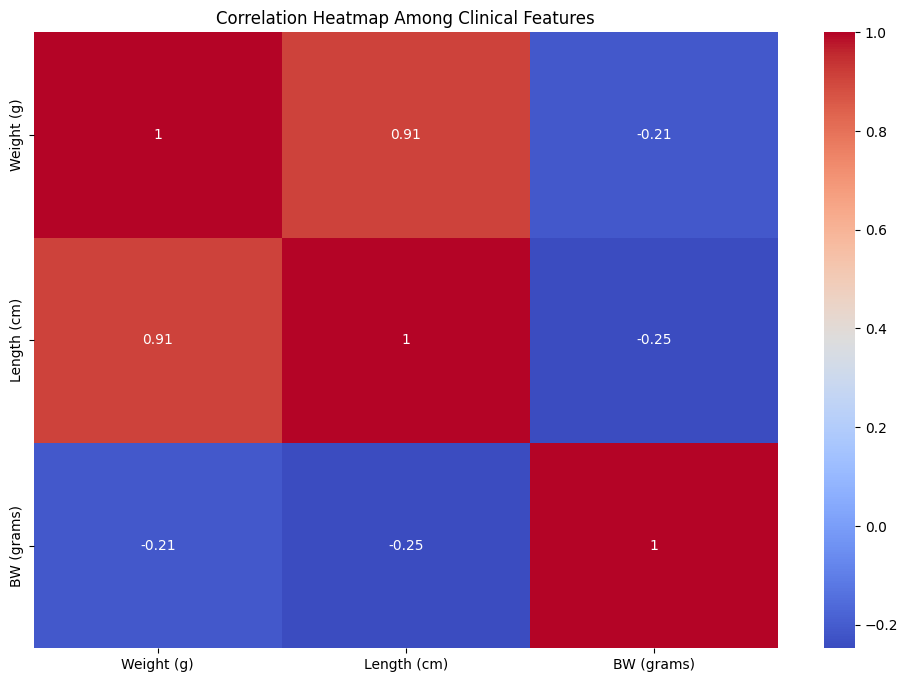

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(clinical_num.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Among Clinical Features")
plt.show()


In [ ]:
clinical_aug = pd.read_csv("clinical_augmented.csv")
clinical_aug.head()

,Weight (g),Length (cm),Sex,BW (grams),GA (weeks),PMA at Study (weeks),clean_label
0,3718,51.0,M,1010,24.714286,38.428571,0.0
1,2890,48.5,F,890,28.000000,40.000000,1.0
2,3975,51.0,F,630,29.000000,47.857143,1.0
3,3952,52.0,F,550,28.428571,49.000000,1.0
4,3505,49.0,F,610,25.428571,42.000000,1.0


In [ ]:
X = clinical_aug.drop(columns=["clean_label"])
y = clinical_aug["clean_label"].astype(int)

X = pd.get_dummies(X, columns=['Sex'], drop_first=True, dtype=float)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC(name="auc")]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.20,
    epochs=50,
    batch_size=8,
    verbose=2,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
)


Epoch 1/50
4/4 - 0s - 27ms/step - accuracy: 0.9286 - auc: 0.9847 - loss: 0.2109 - val_accuracy: 0.8750 - val_auc: 0.8125 - val_loss: 0.3704
Epoch 2/50
4/4 - 0s - 19ms/step - accuracy: 0.9643 - auc: 1.0000 - loss: 0.1648 - val_accuracy: 0.8750 - val_auc: 0.8125 - val_loss: 0.3729
Epoch 3/50
4/4 - 0s - 19ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.1621 - val_accuracy: 0.8750 - val_auc: 0.8125 - val_loss: 0.3755
Epoch 4/50
4/4 - 0s - 24ms/step - accuracy: 0.9286 - auc: 0.9898 - loss: 0.1833 - val_accuracy: 0.8750 - val_auc: 0.8125 - val_loss: 0.3780
Epoch 5/50
4/4 - 0s - 19ms/step - accuracy: 0.9286 - auc: 0.9745 - loss: 0.2223 - val_accuracy: 0.8750 - val_auc: 0.8125 - val_loss: 0.3803
Epoch 6/50
4/4 - 0s - 19ms/step - accuracy: 0.9643 - auc: 0.9949 - loss: 0.1997 - val_accuracy: 0.8750 - val_auc: 0.8125 - val_loss: 0.3838
Epoch 7/50
4/4 - 0s - 19ms/step - accuracy: 0.9286 - auc: 0.9898 - loss: 0.1969 - val_accuracy: 0.8750 - val_auc: 0.8125 - val_loss: 0.3882
Epoch 8/50
4/4 - 0s 

In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
import numpy as np

probs = model.predict(X_test)
y_pred = (probs > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

try:
    print("ROC-AUC:", roc_auc_score(y_test, probs))
except:
    print("ROC-AUC could not be computed.")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Accuracy: 0.9
Precision: 1.0
Recall: 0.8
F1 Score: 0.8888888888888888
ROC-AUC: 0.9600000000000001

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10


Confusion Matrix:
[[5 0]
 [1 4]]


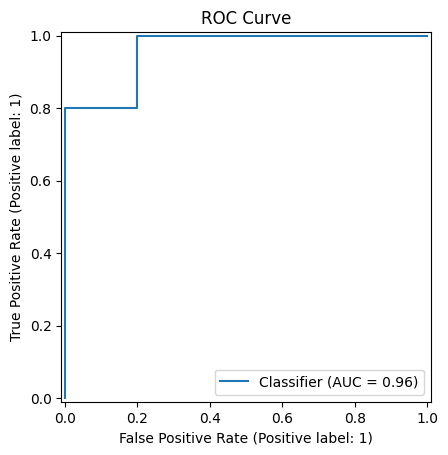

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_test, probs)
plt.title("ROC Curve")
plt.show()


In [ ]:
import os

ROOT = "/content/drive/MyDrive/Nifti-data"

subjects = sorted([d for d in os.listdir(ROOT) if d.startswith("BPD-Neo")])
print("Number of subjects:", len(subjects))
print(subjects[:])


Number of subjects: 40
['BPD-Neo-01', 'BPD-Neo-02', 'BPD-Neo-03', 'BPD-Neo-04', 'BPD-Neo-05', 'BPD-Neo-06', 'BPD-Neo-07', 'BPD-Neo-08', 'BPD-Neo-09', 'BPD-Neo-10', 'BPD-Neo-11', 'BPD-Neo-12', 'BPD-Neo-13', 'BPD-Neo-14', 'BPD-Neo-15', 'BPD-Neo-16', 'BPD-Neo-17', 'BPD-Neo-18', 'BPD-Neo-19', 'BPD-Neo-20', 'BPD-Neo-21', 'BPD-Neo-22', 'BPD-Neo-23', 'BPD-Neo-24', 'BPD-Neo-25', 'BPD-Neo-26', 'BPD-Neo-27', 'BPD-Neo-28', 'BPD-Neo-29', 'BPD-Neo-30', 'BPD-Neo-31', 'BPD-Neo-32', 'BPD-Neo-33', 'BPD-Neo-34', 'BPD-Neo-35', 'BPD-Neo-36', 'BPD-Neo-37', 'BPD-Neo-38', 'BPD-Neo-39', 'BPD-Neo-40']


In [ ]:
for subj in subjects[:]:
    subj_path = os.path.join(ROOT, subj)
    print(f"\n📁 {subj}")
    for folder in os.listdir(subj_path):
        print("  └──", folder)



📁 BPD-Neo-01
  └── lung_seg
  └── image

📁 BPD-Neo-02
  └── lung_seg
  └── trachea_seg_R2
  └── trachea_seg
  └── image

📁 BPD-Neo-03
  └── image
  └── lung_seg

📁 BPD-Neo-04
  └── lung_seg
  └── trachea_seg
  └── image
  └── trachea_seg_R2

📁 BPD-Neo-05
  └── trachea_seg_R2
  └── lung_seg
  └── trachea_seg
  └── image

📁 BPD-Neo-06
  └── trachea_seg
  └── image
  └── trachea_seg_R2
  └── lung_seg

📁 BPD-Neo-07
  └── trachea_seg_R2
  └── trachea_seg
  └── lung_seg
  └── image

📁 BPD-Neo-08
  └── lung_seg
  └── image
  └── trachea_seg
  └── trachea_seg_R2

📁 BPD-Neo-09
  └── lung_seg
  └── trachea_seg
  └── trachea_seg_R2
  └── image

📁 BPD-Neo-10
  └── image
  └── trachea_seg
  └── lung_seg_R2
  └── lung_seg

📁 BPD-Neo-11
  └── image
  └── lung_seg
  └── lung_seg_R2

📁 BPD-Neo-12
  └── image
  └── lung_seg
  └── trachea_seg
  └── lung_seg_R2

📁 BPD-Neo-13
  └── lung_seg_R2
  └── lung_seg
  └── image
  └── trachea_seg

📁 BPD-Neo-14
  └── lung_seg_R2
  └── image
  └── trachea_seg
  └── 

In [ ]:
slice_counts = {}

for subj in subjects:
    img_dir = os.path.join(ROOT, subj, "image")
    slices = sorted([f for f in os.listdir(img_dir) if f.endswith(".png")])
    slice_counts[subj] = len(slices)

print("\nSlice count distribution:")
for subj, count in slice_counts.items():
    print(subj, ":", count)



Slice count distribution:
BPD-Neo-01 : 60
BPD-Neo-02 : 96
BPD-Neo-03 : 48
BPD-Neo-04 : 32
BPD-Neo-05 : 60
BPD-Neo-06 : 60
BPD-Neo-07 : 44
BPD-Neo-08 : 60
BPD-Neo-09 : 60
BPD-Neo-10 : 60
BPD-Neo-11 : 60
BPD-Neo-12 : 72
BPD-Neo-13 : 72
BPD-Neo-14 : 60
BPD-Neo-15 : 44
BPD-Neo-16 : 48
BPD-Neo-17 : 60
BPD-Neo-18 : 72
BPD-Neo-19 : 88
BPD-Neo-20 : 64
BPD-Neo-21 : 60
BPD-Neo-22 : 72
BPD-Neo-23 : 60
BPD-Neo-24 : 60
BPD-Neo-25 : 60
BPD-Neo-26 : 60
BPD-Neo-27 : 60
BPD-Neo-28 : 60
BPD-Neo-29 : 60
BPD-Neo-30 : 48
BPD-Neo-31 : 60
BPD-Neo-32 : 60
BPD-Neo-33 : 60
BPD-Neo-34 : 60
BPD-Neo-35 : 60
BPD-Neo-36 : 48
BPD-Neo-37 : 60
BPD-Neo-38 : 60
BPD-Neo-39 : 60
BPD-Neo-40 : 60


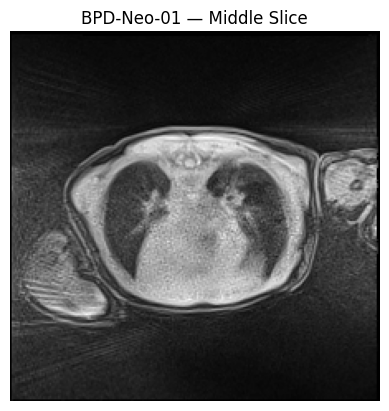

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

sample_subj = "BPD-Neo-01"
img_dir = os.path.join(ROOT, sample_subj, "image")

slices = sorted([f for f in os.listdir(img_dir) if f.endswith(".png")])
mid_slice = os.path.join(img_dir, slices[len(slices)//2])

img = Image.open(mid_slice).convert("L")

plt.imshow(img, cmap='gray')
plt.title(f"{sample_subj} — Middle Slice")
plt.axis("off")
plt.show()


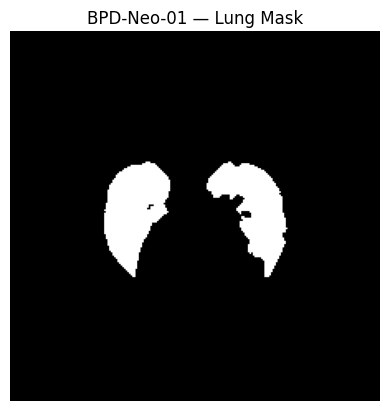

In [ ]:
mask_dir = os.path.join(ROOT, sample_subj, "lung_seg")
mask_slices = sorted([f for f in os.listdir(mask_dir) if f.endswith(".png")])

mask_slice = os.path.join(mask_dir, mask_slices[len(mask_slices)//2])
mask = Image.open(mask_slice).convert("L")

plt.imshow(mask, cmap='gray')
plt.title(f"{sample_subj} — Lung Mask")
plt.axis("off")
plt.show()


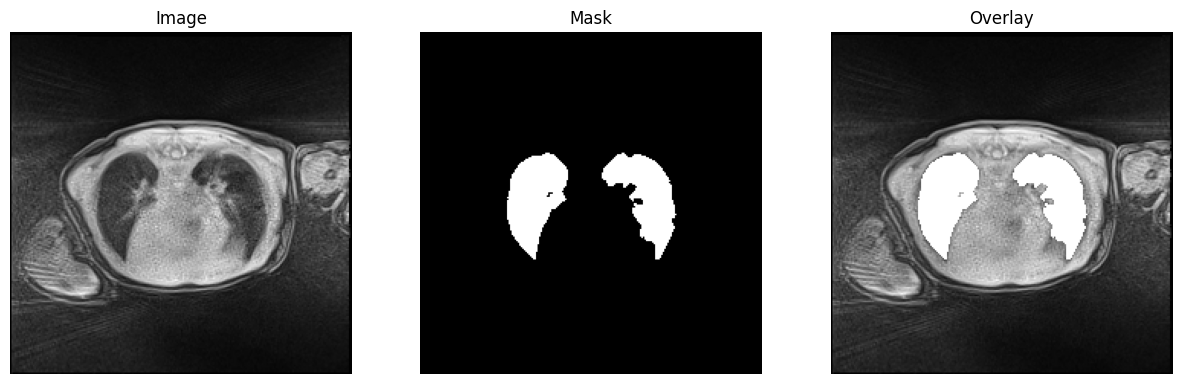

In [ ]:
img_arr = np.array(img)
mask_arr = np.array(mask)

overlay = img_arr.copy()
overlay[mask_arr > 0] = 255

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(img_arr, cmap='gray'); plt.title("Image"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(mask_arr, cmap='gray'); plt.title("Mask"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(overlay, cmap='gray'); plt.title("Overlay"); plt.axis("off")
plt.show()


In [ ]:
lung_area = {}

for subj in subjects:
    mask_dir = os.path.join(ROOT, subj, "lung_seg")
    if not os.path.exists(mask_dir):
        continue

    masks = sorted([f for f in os.listdir(mask_dir) if f.endswith(".png")])
    areas = []
    for m in masks:
        arr = np.array(Image.open(os.path.join(mask_dir, m)).convert("L"))
        areas.append(arr.sum())

    lung_area[subj] = np.mean(areas)

lung_area


{'BPD-Neo-01': np.float64(429003.5),
 'BPD-Neo-02': np.float64(610307.96875),
 'BPD-Neo-03': np.float64(110027.1875),
 'BPD-Neo-04': np.float64(137811.5625),
 'BPD-Neo-05': np.float64(107142.5),
 'BPD-Neo-06': np.float64(85425.0),
 'BPD-Neo-07': np.float64(146225.11363636365),
 'BPD-Neo-08': np.float64(83584.75),
 'BPD-Neo-09': np.float64(91086.0),
 'BPD-Neo-10': np.float64(91783.0),
 'BPD-Neo-11': np.float64(93954.75),
 'BPD-Neo-12': np.float64(983977.7083333334),
 'BPD-Neo-13': np.float64(417665.2083333333),
 'BPD-Neo-14': np.float64(173646.5),
 'BPD-Neo-15': np.float64(749578.2954545454),
 'BPD-Neo-16': np.float64(379227.5),
 'BPD-Neo-17': np.float64(300861.75),
 'BPD-Neo-18': np.float64(233243.54166666666),
 'BPD-Neo-19': np.float64(445734.20454545453),
 'BPD-Neo-20': np.float64(348720.46875),
 'BPD-Neo-21': np.float64(312154.0),
 'BPD-Neo-22': np.float64(194642.91666666666),
 'BPD-Neo-23': np.float64(340603.5),
 'BPD-Neo-24': np.float64(282034.25),
 'BPD-Neo-25': np.float64(193549

In [ ]:
from PIL import Image
img = Image.open("/content/drive/MyDrive/Nifti-data/BPD-Neo-01/image/slice_000.png")
img.size


(224, 224)

In [ ]:
!rsync -av --progress "/content/drive/MyDrive/Nifti-data/" "/content/Nifti-data/"


Streaming output truncated to the last 5000 lines.
            435 100%    0.64kB/s    0:00:00 (xfr#5626, ir-chk=1024/6783)
BPD-Neo-26/trachea_seg/slice_038.png
            435 100%    0.64kB/s    0:00:00 (xfr#5627, ir-chk=1023/6783)
BPD-Neo-26/trachea_seg/slice_039.png
            432 100%    0.64kB/s    0:00:00 (xfr#5628, ir-chk=1022/6783)
BPD-Neo-26/trachea_seg/slice_040.png
            431 100%    0.63kB/s    0:00:00 (xfr#5629, ir-chk=1021/6783)
BPD-Neo-26/trachea_seg/slice_041.png
            431 100%    0.63kB/s    0:00:00 (xfr#5630, ir-chk=1020/6783)
BPD-Neo-26/trachea_seg/slice_042.png
            431 100%    0.63kB/s    0:00:00 (xfr#5631, ir-chk=1019/6783)
BPD-Neo-26/trachea_seg/slice_043.png
            431 100%    0.63kB/s    0:00:00 (xfr#5632, ir-chk=1018/6783)
BPD-Neo-26/trachea_seg/slice_044.png
            431 100%    0.62kB/s    0:00:00 (xfr#5633, ir-chk=1017/6783)
BPD-Neo-26/trachea_seg/slice_045.png
            434 100%    0.63kB/s    0:00:00 (xfr#5634, ir-chk=1016/67

In [ ]:
import os

ROOT = "/content/Nifti-data"
folders = [d for d in os.listdir(ROOT) if d.startswith("BPD-Neo")]
print("Total folders:", len(folders))
print(folders)


Total folders: 40
['BPD-Neo-20', 'BPD-Neo-33', 'BPD-Neo-16', 'BPD-Neo-01', 'BPD-Neo-34', 'BPD-Neo-31', 'BPD-Neo-25', 'BPD-Neo-15', 'BPD-Neo-12', 'BPD-Neo-11', 'BPD-Neo-24', 'BPD-Neo-39', 'BPD-Neo-19', 'BPD-Neo-09', 'BPD-Neo-13', 'BPD-Neo-08', 'BPD-Neo-22', 'BPD-Neo-02', 'BPD-Neo-06', 'BPD-Neo-14', 'BPD-Neo-35', 'BPD-Neo-30', 'BPD-Neo-10', 'BPD-Neo-21', 'BPD-Neo-28', 'BPD-Neo-26', 'BPD-Neo-29', 'BPD-Neo-37', 'BPD-Neo-17', 'BPD-Neo-05', 'BPD-Neo-23', 'BPD-Neo-03', 'BPD-Neo-07', 'BPD-Neo-27', 'BPD-Neo-04', 'BPD-Neo-36', 'BPD-Neo-18', 'BPD-Neo-40', 'BPD-Neo-32', 'BPD-Neo-38']


In [ ]:
import os

ROOT = "/content/Nifti-data"

slice_counts = {}

for subj in sorted(os.listdir(ROOT)):
    if not subj.startswith("BPD-Neo"):
        continue

    img_dir = os.path.join(ROOT, subj, "image")

    slices = [f for f in os.listdir(img_dir) if f.lower().endswith(".png")]
    slice_counts[subj] = len(slices)

for subj, count in slice_counts.items():
    print(f"{subj}: {count} slices")

print("\nTotal subjects:", len(slice_counts))


BPD-Neo-01: 60 slices
BPD-Neo-02: 96 slices
BPD-Neo-03: 48 slices
BPD-Neo-04: 32 slices
BPD-Neo-05: 60 slices
BPD-Neo-06: 60 slices
BPD-Neo-07: 44 slices
BPD-Neo-08: 60 slices
BPD-Neo-09: 60 slices
BPD-Neo-10: 60 slices
BPD-Neo-11: 60 slices
BPD-Neo-12: 72 slices
BPD-Neo-13: 72 slices
BPD-Neo-14: 60 slices
BPD-Neo-15: 44 slices
BPD-Neo-16: 48 slices
BPD-Neo-17: 60 slices
BPD-Neo-18: 72 slices
BPD-Neo-19: 88 slices
BPD-Neo-20: 64 slices
BPD-Neo-21: 60 slices
BPD-Neo-22: 72 slices
BPD-Neo-23: 60 slices
BPD-Neo-24: 60 slices
BPD-Neo-25: 60 slices
BPD-Neo-26: 60 slices
BPD-Neo-27: 60 slices
BPD-Neo-28: 60 slices
BPD-Neo-29: 60 slices
BPD-Neo-30: 48 slices
BPD-Neo-31: 60 slices
BPD-Neo-32: 60 slices
BPD-Neo-33: 60 slices
BPD-Neo-34: 60 slices
BPD-Neo-35: 60 slices
BPD-Neo-36: 48 slices
BPD-Neo-37: 60 slices
BPD-Neo-38: 60 slices
BPD-Neo-39: 60 slices
BPD-Neo-40: 60 slices

Total subjects: 40


In [ ]:
import numpy as np

counts = np.array(list(slice_counts.values()))

print("Min slices:", counts.min())
print("Max slices:", counts.max())
print("Mean slices:", counts.mean())
print("Median slices:", np.median(counts))


Min slices: 32
Max slices: 96
Mean slices: 60.2
Median slices: 60.0


In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight


In [ ]:
import pandas as pd

clinical_raw = pd.read_excel("BPD-Neo-clinical_data.xlsx")

label_map = {
    "Grade I": 0,
    "Grade II": 1,
    "Grade III": 1
}

clinical_raw["BPD_bin"] = clinical_raw["Jensen 2019 BPD Definition"].map(label_map)
id_to_label = dict(zip(clinical_raw["ID"], clinical_raw["BPD_bin"]))

In [ ]:
import os
import numpy as np
import cv2
from tqdm import tqdm

ROOT = "/content/Nifti-data"
TARGET_SLICES = 32
IMG_H = 128
IMG_W = 128

def load_volume(subj_folder):
    img_dir = os.path.join(subj_folder, "image")
    slice_files = sorted([f for f in os.listdir(img_dir) if f.endswith(".png")])

    n = len(slice_files)
    idxs = np.linspace(0, n - 1, TARGET_SLICES).astype(int)

    volume_slices = []
    for idx in idxs:
        p = os.path.join(img_dir, slice_files[idx])
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_W, IMG_H))
        img = img.astype(np.float32) / 255.0
        volume_slices.append(img)

    return np.stack(volume_slices, axis=0)


In [ ]:
volumes = []
labels = []
subjects_used = []

for subj in tqdm(sorted(os.listdir(ROOT))):
    if not subj.startswith("BPD-Neo"):
        continue

    subj_path = os.path.join(ROOT, subj)

    label = id_to_label.get(subj, None)
    if label is None or (isinstance(label, float) and np.isnan(label)):
        print("Skipping (no label or NaN label):", subj)
        continue

    vol = load_volume(subj_path)
    volumes.append(vol)
    labels.append(label)
    subjects_used.append(subj)

volumes = np.array(volumes)
labels = np.array(labels).astype(int)

print("Final volumes shape:", volumes.shape)
print("Label distribution:", np.bincount(labels))

 30%|███       | 12/40 [00:00<00:00, 107.16it/s]

Skipping (no label or NaN label): BPD-Neo-01
Skipping (no label or NaN label): BPD-Neo-04
Skipping (no label or NaN label): BPD-Neo-06
Skipping (no label or NaN label): BPD-Neo-10
Skipping (no label or NaN label): BPD-Neo-11


 57%|█████▊    | 23/40 [00:00<00:00, 70.13it/s] 

Skipping (no label or NaN label): BPD-Neo-18
Skipping (no label or NaN label): BPD-Neo-22


100%|██████████| 40/40 [00:00<00:00, 57.86it/s]

Final volumes shape: (33, 32, 128, 128)
Label distribution: [10 23]


In [ ]:
clinical_raw["ID"]


,ID
0,BPD-Neo-01
1,BPD-Neo-02
2,BPD-Neo-03
3,BPD-Neo-04
4,BPD-Neo-05
5,BPD-Neo-06
6,BPD-Neo-07
7,BPD-Neo-08
8,BPD-Neo-09
9,BPD-Neo-10


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

if volumes.ndim == 4:
    volumes = volumes[..., np.newaxis]

SEED = 42
test_size = 0.30
val_ratio_of_temp = 0.5

X_train, X_temp, y_train, y_temp, subj_train, subj_temp = train_test_split(
    volumes, labels, subjects_used,
    test_size=test_size, random_state=SEED, stratify=labels)

X_val, X_test, y_val, y_test, subj_val, subj_test = train_test_split(
    X_temp, y_temp, subj_temp,
    test_size=val_ratio_of_temp, random_state=SEED, stratify=y_temp)

print("Shapes:")
print(" X_train:", X_train.shape, " y_train:", y_train.shape)
print(" X_val:  ", X_val.shape, " y_val:  ", y_val.shape)
print(" X_test: ", X_test.shape, " y_test: ", y_test.shape)


Shapes:
 X_train: (23, 32, 128, 128, 1)  y_train: (23,)
 X_val:   (5, 32, 128, 128, 1)  y_val:   (5,)
 X_test:  (5, 32, 128, 128, 1)  y_test:  (5,)


In [ ]:
import tensorflow as tf

BATCH_SIZE = 4
AUTOTUNE = tf.data.AUTOTUNE

def make_dataset(X, y, batch=BATCH_SIZE, shuffle=True, augment=False):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(X), seed=SEED)
    ds = ds.batch(batch).prefetch(AUTOTUNE)
    return ds

train_ds = make_dataset(X_train, y_train, batch=BATCH_SIZE, shuffle=True)
val_ds   = make_dataset(X_val, y_val, batch=BATCH_SIZE, shuffle=False)
test_ds  = make_dataset(X_test, y_test, batch=1, shuffle=False)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import tensorflow.keras as keras
from tensorflow.keras import layers

classes = np.unique(y_train)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weights = {int(classes[i]): float(cw[i]) for i in range(len(classes))}
print("Class weights:", class_weights)

def build_3d_cnn(input_shape=(32, 128, 128, 1)):
    inp = keras.Input(shape=input_shape)
    x = layers.Conv3D(16, 3, activation='relu', padding='same')(inp)
    x = layers.MaxPool3D(2)(x)
    x = layers.Conv3D(32, 3, activation='relu', padding='same')(x)
    x = layers.MaxPool3D(2)(x)
    x = layers.Conv3D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPool3D(2)(x)
    x = layers.Conv3D(128, 3, activation='relu', padding='same')(x)
    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(64, activation='relu')(x)
    out = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inp, out)
    return model

input_shape = X_train.shape[1:]
model = build_3d_cnn(input_shape=input_shape)
model.compile(optimizer=keras.optimizers.Adam(1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.AUC(name='auc')])
model.summary()

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=8, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint('best_image_3dcnn.h5', monitor='val_auc', mode='max', save_best_only=True)
]

EPOCHS = 60
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=2
)


Class weights: {0: 1.6428571428571428, 1: 0.71875}


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 128, 128,   │             0 │
│                                 │ 1)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d (Conv3D)                 │ (None, 32, 128, 128,   │           448 │
│                                 │ 16)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 16, 64, 64, 16) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 16, 64, 64, 32) │        13,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 8, 32, 32, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 8, 32, 32, 64)  │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 4, 16, 16, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_3 (Conv3D)               │ (None, 4, 16, 16, 128) │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling3d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling3D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299,297 (1.14 MB)

 Trainable params: 299,297 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60


6/6 - 19s - 3s/step - accuracy: 0.6957 - auc: 0.5446 - loss: 0.6933 - val_accuracy: 0.8000 - val_auc: 0.5000 - val_loss: 0.6865
Epoch 2/60
6/6 - 5s - 853ms/step - accuracy: 0.6957 - auc: 0.5536 - loss: 0.6933 - val_accuracy: 0.8000 - val_auc: 0.5000 - val_loss: 0.6826
Epoch 3/60


6/6 - 0s - 69ms/step - accuracy: 0.6957 - auc: 0.6116 - loss: 0.6917 - val_accuracy: 0.8000 - val_auc: 0.7500 - val_loss: 0.6839
Epoch 4/60
6/6 - 0s - 52ms/step - accuracy: 0.6957 - auc: 0.5000 - loss: 0.6937 - val_accuracy: 0.8000 - val_auc: 0.5000 - val_loss: 0.6830
Epoch 5/60
6/6 - 1s - 117ms/step - accuracy: 0.6957 - auc: 0.3616 - loss: 0.6954 - val_accuracy: 0.8000 - val_auc: 0.6250 - val_loss: 0.6845
Epoch 6/60
6/6 - 0s - 74ms/step - accuracy: 0.6957 - auc: 0.5000 - loss: 0.6937 - val_accuracy: 0.8000 - val_auc: 0.5000 - val_loss: 0.6832
Epoch 7/60
6/6 - 1s - 100ms/step - accuracy: 0.6957 - auc: 0.6071 - loss: 0.6923 - val_accuracy: 0.8000 - val_auc: 0.5000 - val_loss: 0.6859
Epoch 8/60
6/6 - 0s - 68ms/step - accuracy: 0.6957 - auc: 0.6964 - loss: 0.6915 - val_accuracy: 0.8000 - val_auc: 0.5000 - val_loss: 0.6849
Epoch 9/60
6/6 - 0s - 77ms/step - accuracy: 0.6957 - auc: 0.3705 - loss: 0.6944 - val_accuracy: 0.8000 - val_auc: 0.5000 - val_loss: 0.6861
Epoch 10/60
6/6 - 0s - 75ms/s

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

y_probs = model.predict(test_ds).reshape(-1)
y_pred  = (y_probs >= 0.5).astype(int)
y_true  = y_test

print("Samples in test set:", len(y_true))
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, zero_division=0))
print("Recall:", recall_score(y_true, y_pred, zero_division=0))
print("F1:", f1_score(y_true, y_pred, zero_division=0))
print("ROC-AUC:", roc_auc_score(y_true, y_probs))

print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
Samples in test set: 5
Accuracy: 0.6
Precision: 0.6
Recall: 1.0
F1: 0.75
ROC-AUC: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5

Confusion Matrix:
 [[0 2]
 [0 3]]


In [ ]:
import os, json
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

ROOT = "/content/Nifti-data"
CLINICAL_XLSX = "BPD-Neo-clinical_data.xlsx"
TARGET_SLICES = 32
IMG_H = 128
IMG_W = 128
BATCH_SIZE = 4
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
def get_lung_bbox_from_masks(mask_folder):
    """
    Reads all mask PNGs in mask_folder, assumes binary mask (0 background, nonzero lung).
    Returns bbox as (ymin,ymax,xmin,xmax) in mask coordinates.
    """
    files = sorted([f for f in os.listdir(mask_folder) if f.lower().endswith(".png")])
    if len(files) == 0:
        return None
    ys_min, ys_max = [], []
    xs_min, xs_max = [], []
    for f in files:
        m = cv2.imread(os.path.join(mask_folder, f), cv2.IMREAD_GRAYSCALE)
        if m is None:
            continue
        nonzero = np.where(m > 0)
        if nonzero[0].size == 0:
            continue
        ys_min.append(nonzero[0].min()); ys_max.append(nonzero[0].max())
        xs_min.append(nonzero[1].min()); xs_max.append(nonzero[1].max())
    if len(ys_min) == 0:
        return None
    ymin, ymax = min(ys_min), max(ys_max)
    xmin, xmax = min(xs_min), max(xs_max)
    return ymin, ymax, xmin, xmax

def expand_bbox(bbox, img_h, img_w, pad_frac=0.08):
    ymin,ymax,xmin,xmax = bbox
    h_val = ymax - ymin + 1
    w_val = xmax - xmin + 1
    pad_h = int(h_val * pad_frac)
    pad_w = int(w_val * pad_frac)
    ymin = max(0, ymin - pad_h)
    ymax = min(img_h-1, ymax + pad_h)
    xmin = max(0, xmin - pad_w)
    xmax = min(img_w-1, xmax + pad_w)
    return int(ymin), int(ymax), int(xmin), int(xmax)

def crop_and_resize_volume(subj_folder, target_slices=TARGET_SLICES, h=IMG_H, w=IMG_W):
    img_dir = os.path.join(subj_folder, "image")
    mask_dir = os.path.join(subj_folder, "lung_seg")
    slice_files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(".png")])
    if len(slice_files) == 0:
        raise ValueError(f"No slices found in {img_dir}")

    ymin, ymax, xmin, xmax = 0, 0, 0, 0

    bbox_coords_from_masks = None
    if os.path.isdir(mask_dir):
        bbox_candidate = get_lung_bbox_from_masks(mask_dir)
        if bbox_candidate is not None:
            mask_files = sorted([f for f in os.listdir(mask_dir) if f.lower().endswith(".png")])
            if mask_files:
                sample_mask = cv2.imread(os.path.join(mask_dir, mask_files[0]), cv2.IMREAD_GRAYSCALE)
                if sample_mask is not None:
                    bbox_coords_from_masks = expand_bbox(bbox_candidate, sample_mask.shape[0], sample_mask.shape[1], pad_frac=0.08)

    if bbox_coords_from_masks is not None:
        ymin, ymax, xmin, xmax = bbox_coords_from_masks
    else:
        sample_img = cv2.imread(os.path.join(img_dir, slice_files[0]), cv2.IMREAD_GRAYSCALE)
        if sample_img is None:
            raise ValueError(f"Could not read sample image for {subj_folder} to determine default crop area.")

        H0, W0 = sample_img.shape
        side = min(H0, W0)
        cy, cx = H0 // 2, W0 // 2
        half = side // 2
        ymin_calc, ymax_calc = cy - half, cy + half
        xmin_calc, xmax_calc = cx - half, cx + half

        ymin = max(0, int(ymin_calc))
        ymax = min(H0 - 1, int(ymax_calc))
        xmin = max(0, int(xmin_calc))
        xmax = min(W0 - 1, int(xmax_calc))
        if ymin >= ymax or xmin >= xmax:
            ymin, ymax = 0, H0 - 1
            xmin, xmax = 0, W0 - 1
            print(f"Warning: Invalid default crop for {subj_folder}. Using full image dimensions.")

    n = len(slice_files)
    idxs = np.linspace(0, n - 1, target_slices).astype(int)
    vol = []
    for idx in idxs:
        p = os.path.join(img_dir, slice_files[idx])
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)

        if img is None:
            processed_slice = np.zeros((h, w), dtype=np.float32)
        else:
            current_H, current_W = img.shape
            safe_ymin = max(0, min(ymin, current_H - 1))
            safe_ymax = max(0, min(ymax, current_H - 1))
            safe_xmin = max(0, min(xmin, current_W - 1))
            safe_xmax = max(0, min(xmax, current_W - 1))

            if safe_ymin >= safe_ymax or safe_xmin >= safe_xmax:
                crop = img
                print(f"Warning: Bounding box invalid for slice {p}. Resizing full slice.")
            else:
                if (safe_ymax + 1 <= safe_ymin) or (safe_xmax + 1 <= safe_xmin):
                    crop = img
                    print(f"Warning: Calculated crop region has zero or negative dimension for slice {p}. Using full image.")
                else:
                    crop = img[safe_ymin:safe_ymax + 1, safe_xmin:safe_xmax + 1]

            if crop.size == 0:
                processed_slice = np.zeros((h, w), dtype=np.float32)
            else:
                processed_slice = cv2.resize(crop, (w, h), interpolation=cv2.INTER_LINEAR).astype(np.float32) / 255.0

        rgb = np.stack([processed_slice, processed_slice, processed_slice], axis=-1)
        vol.append(rgb)

    if not vol:
        raise ValueError(f"No valid volume slices processed for {subj_folder}")
    return np.stack(vol, axis=0)

In [ ]:
clinical = pd.read_excel(CLINICAL_XLSX)
label_map = {"Grade I": 0, "Grade II": 1, "Grade III": 1}
clinical["BPD_bin"] = clinical["Jensen 2019 BPD Definition"].map(label_map)

id_to_label = dict(zip(clinical["ID"], clinical["BPD_bin"]))

subjects = sorted([d for d in os.listdir(ROOT) if d.startswith("BPD-Neo")])

X_list = []
y_list = []
used_subj = []

for subj in tqdm(subjects, desc="Preprocessing volumes"):
    lab = id_to_label.get(subj, None)
    if lab is None or (isinstance(lab, float) and np.isnan(lab)):
        continue
    subj_path = os.path.join(ROOT, subj)
    try:
        vol = crop_and_resize_volume(subj_path, target_slices=TARGET_SLICES, h=IMG_H, w=IMG_W)
    except Exception as e:
        print("Error for", subj, e)
        continue
    X_list.append(vol)
    y_list.append(int(lab))
    used_subj.append(subj)

X_vols = np.array(X_list)
y = np.array(y_list, dtype=int)

print("Built volumes:", X_vols.shape, "labels:", np.bincount(y))

Preprocessing volumes: 100%|██████████| 40/40 [00:01<00:00, 22.18it/s]


Built volumes: (33, 32, 128, 128, 3) labels: [10 23]


In [ ]:
import tensorflow as tf
import numpy as np

def random_flip(volume):
    if tf.random.uniform([]) < 0.5:
        volume = tf.reverse(volume, axis=[2])
    return volume

def random_brightness(volume, max_delta=0.12):
    return tf.image.adjust_brightness(volume, tf.random.uniform([], -max_delta, max_delta))

def rotate_volume(volume, max_angle=7.0):
    """
    Rotate every slice in the 3D volume by the same random angle.
    This version fixes the missing `fill_value` error.
    """
    angle_rad = tf.random.uniform([], -max_angle, max_angle) * (np.pi / 180.0)

    def rotate_slice(img):
        img = tf.expand_dims(img, 0)
        transform = tf.stack([
            tf.math.cos(angle_rad), -tf.math.sin(angle_rad), 0.0,
            tf.math.sin(angle_rad),  tf.math.cos(angle_rad), 0.0,
            0.0, 0.0
        ])
        transform = tf.reshape(transform, [1, 8])
        rotated = tf.raw_ops.ImageProjectiveTransformV3(
            images=img,
            transforms=transform,
            output_shape=[IMG_H, IMG_W],
            interpolation="BILINEAR",
            fill_value=0.0
        )
        return rotated[0]

    return tf.map_fn(rotate_slice, volume)

def random_zoom(volume, min_zoom=0.95, max_zoom=1.05):
    z = tf.random.uniform([], min_zoom, max_zoom)
    D, H, W, C = tf.unstack(tf.shape(volume))

    new_h = tf.cast(tf.cast(H, tf.float32) * z, tf.int32)
    new_w = tf.cast(tf.cast(W, tf.float32) * z, tf.int32)

    zoomed = tf.image.resize(volume, (new_h, new_w))
    zoomed = tf.image.resize_with_crop_or_pad(zoomed, H, W)
    return zoomed

def augment_volume(volume, label):
    volume = random_flip(volume)
    volume = rotate_volume(volume)
    volume = random_zoom(volume)
    volume = random_brightness(volume)

    volume = tf.clip_by_value(volume, 0.0, 1.0)
    return volume, label


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_vols, y, test_size=0.30, random_state=SEED, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=SEED, stratify=y_temp)

print("Train/Val/Test:", X_train.shape, X_val.shape, X_test.shape)

def make_dataset(X, y, batch=BATCH_SIZE, training=False):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if training:
        ds = ds.shuffle(buffer_size=len(X), seed=SEED)
        ds = ds.map(lambda v, l: augment_volume(v, l), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch).prefetch(AUTOTUNE)
    return ds

train_ds = make_dataset(X_train, y_train, batch=BATCH_SIZE, training=True)
val_ds = make_dataset(X_val, y_val, batch=BATCH_SIZE, training=False)
test_ds = make_dataset(X_test, y_test, batch=1, training=False)


Train/Val/Test: (23, 32, 128, 128, 3) (5, 32, 128, 128, 3) (5, 32, 128, 128, 3)


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess

def build_slicewise_model(num_slices=TARGET_SLICES, h=IMG_H, w=IMG_W, channels=3, train_base=False):
    inp = keras.Input(shape=(num_slices, h, w, channels), name="volume_input")

    x = layers.TimeDistributed(layers.Lambda(lambda z: eff_preprocess(z * 255.0)))(inp)
    base = EfficientNetB0(include_top=False, weights='imagenet', pooling='avg', input_shape=(h,w,3))
    base.trainable = bool(train_base)

    td = layers.TimeDistributed(base)(x)

    agg = layers.GlobalAveragePooling1D()(td)

    x = layers.Dropout(0.4)(agg)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=inp, outputs=out)
    return model

model = build_slicewise_model(train_base=False)
model.compile(optimizer=keras.optimizers.Adam(1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.AUC(name='auc')])
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ volume_input (InputLayer)       │ (None, 32, 128, 128,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 32, 128, 128,   │             0 │
│ (TimeDistributed)               │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 32, 1280)       │     4,049,571 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
import tensorflow as tf

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [ ]:
from tensorflow.keras import layers, Model, Input

def build_small_slice_cnn(h=128, w=128, channels=3, embedding_dim=128):
    """
    Small 2D CNN to be applied per-slice (fast).
    Returns a Keras Model that maps (H,W,3) -> (embedding_dim,)
    """
    inp = Input(shape=(h, w, channels))
    x = layers.Conv2D(16, 3, padding='same', activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(2)(x)

    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(2)(x)

    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(2)(x)

    x = layers.Conv2D(96, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dense(embedding_dim, activation='relu')(x)
    x = layers.Activation('linear', dtype='float32')(x)
    model = Model(inputs=inp, outputs=x, name="small_slice_cnn")
    return model


In [ ]:

TARGET_SLICES = 32
IMG_H = 128
IMG_W = 128
CHANNELS = 3
EMBED_DIM = 128

print("Constants set:",
      TARGET_SLICES, IMG_H, IMG_W, CHANNELS)


Constants set: 32 128 128 3


In [ ]:
model = build_fast_slicewise_model(
    num_slices=TARGET_SLICES,
    h=IMG_H,
    w=IMG_W,
    channels=CHANNELS,
    embedding_dim=EMBED_DIM,
    train_base=True
)

opt = tf.keras.optimizers.Adam(1e-4)

model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()


Model: "fast_slicewise_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ volume_input (InputLayer)       │ (None, 32, 128, 128,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 32, 128)        │        92,224 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,897 (441.00 KB)

 Trainable params: 112,481 (439.38 KB)

 Non-trainable params: 416 (1.62 KB)

In [ ]:

import os, gc, math, random, time
from glob import glob
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

DRIVE_ROOT = "/content/drive/MyDrive/Nifti-data"
CLINICAL_XLSX = "BPD-Neo-clinical_data.xlsx"

TARGET_SLICES = 32
IMG_H = 128
IMG_W = 128
CHANNELS = 3
BATCH_SIZE = 4
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

gc.collect()
tf.keras.backend.clear_session()
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

print("Constants:", DRIVE_ROOT, CLINICAL_XLSX, TARGET_SLICES, IMG_H, IMG_W, BATCH_SIZE)


Constants: /content/drive/MyDrive/Nifti-data BPD-Neo-clinical_data.xlsx 32 128 128 4


In [ ]:
def list_subjects(root):
    subs = sorted([d for d in os.listdir(root) if d.startswith("BPD-Neo")])
    return subs

def get_mask_bbox(mask_folder):
    """Compute union bounding box across all non-empty mask slices. Returns None if no masks."""
    if not os.path.isdir(mask_folder):
        return None
    ymins, ymaxs, xmins, xmaxs = [], [], [], []
    for f in sorted(os.listdir(mask_folder)):
        if not f.lower().endswith(".png"):
            continue
        p = os.path.join(mask_folder, f)
        m = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        if m is None:
            continue
        nz = cv2.findNonZero((m>0).astype('uint8'))
        if nz is None:
            continue
        ys = nz[:,0,1]; xs = nz[:,0,0]
        ymins.append(int(ys.min())); ymaxs.append(int(ys.max()))
        xmins.append(int(xs.min())); xmaxs.append(int(xs.max()))
    if len(ymins)==0:
        return None
    ymin, ymax = min(ymins), max(ymaxs)
    xmin, xmax = min(xmins), max(xmaxs)
    return (ymin, ymax, xmin, xmax)

def expand_bbox(bbox, img_h, img_w, pad_frac=0.08):
    ymin,ymax,xmin,xmax = bbox
    h = ymax - ymin + 1
    w = xmax - xmin + 1
    pad_h = int(h * pad_frac)
    pad_w = int(w * pad_frac)
    ymin = max(0, ymin - pad_h); ymax = min(img_h-1, ymax + pad_h)
    xmin = max(0, xmin - pad_w); xmax = min(img_w-1, xmax + pad_w)
    return (ymin, ymax, xmin, xmax)

def load_volume_numpy(subj_path, target_slices=TARGET_SLICES, h=IMG_H, w=IMG_W):
    """
    Return numpy array shape (D, H, W, 3), dtype float32 in [0,1].
    subj_path should be full path to subject folder (e.g. /.../BPD-Neo-01)
    """
    img_dir = os.path.join(subj_path, "image")
    if not os.path.isdir(img_dir):
        raise FileNotFoundError(f"image dir missing: {img_dir}")
    slice_files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(".png")])
    if len(slice_files)==0:
        raise FileNotFoundError(f"no slices in {img_dir}")

    mask_dir = os.path.join(subj_path, "lung_seg")
    bbox = None
    if os.path.isdir(mask_dir):
        bbox0 = get_mask_bbox(mask_dir)
        if bbox0 is not None:
            sample_mask = cv2.imread(os.path.join(mask_dir, sorted(os.listdir(mask_dir))[0]), cv2.IMREAD_GRAYSCALE)
            if sample_mask is not None:
                bbox = expand_bbox(bbox0, sample_mask.shape[0], sample_mask.shape[1], pad_frac=0.08)

    if bbox is None:
        sample_img = cv2.imread(os.path.join(img_dir, slice_files[0]), cv2.IMREAD_GRAYSCALE)
        H0,W0 = sample_img.shape
        side = min(H0, W0)
        cy, cx = H0//2, W0//2
        half = side//2
        ymin, ymax = cy-half, cy+half
        xmin, xmax = cx-half, cx+half
        bbox = (int(ymin), int(ymax), int(xmin), int(xmax))

    ymin, ymax, xmin, xmax = bbox

    n = len(slice_files)
    idxs = np.linspace(0, n-1, target_slices).astype(int)
    vol = []
    for idx in idxs:
        p = os.path.join(img_dir, slice_files[idx])
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        if img is None:
            img = np.zeros((h,w), dtype=np.uint8)
        crop = img[ymin:ymax+1, xmin:xmax+1]
        crop_r = cv2.resize(crop, (w, h), interpolation=cv2.INTER_LINEAR)
        rgb = np.stack([crop_r, crop_r, crop_r], axis=-1)
        vol.append(rgb.astype(np.float32) / 255.0)
    return np.stack(vol, axis=0)


In [ ]:
clin = pd.read_excel(CLINICAL_XLSX)

label_map = {"Grade I": 0, "Grade II": 1, "Grade III": 1}
clin["BPD_bin"] = clin["Jensen 2019 BPD Definition"].map(label_map)
id_to_label = dict(zip(clin["ID"], clin["BPD_bin"]))

subjects = list_subjects(DRIVE_ROOT)
print("Found subjects (total):", len(subjects))

filepaths = []
labels = []
for s in subjects:
    lab = id_to_label.get(s, None)
    if lab is None or (isinstance(lab, float) and np.isnan(lab)):
        continue
    subj_full = os.path.join(DRIVE_ROOT, s)
    if not os.path.isdir(os.path.join(subj_full, "image")):
        continue
    filepaths.append(subj_full)
    labels.append(int(lab))

print("Usable labeled subjects:", len(filepaths))
for i,p in enumerate(filepaths[:5]): print(i, p, "label=", labels[i])


Found subjects (total): 40
Usable labeled subjects: 33
0 /content/drive/MyDrive/Nifti-data/BPD-Neo-02 label= 0
1 /content/drive/MyDrive/Nifti-data/BPD-Neo-03 label= 1
2 /content/drive/MyDrive/Nifti-data/BPD-Neo-05 label= 1
3 /content/drive/MyDrive/Nifti-data/BPD-Neo-07 label= 1
4 /content/drive/MyDrive/Nifti-data/BPD-Neo-08 label= 1


In [ ]:

from sklearn.model_selection import train_test_split
fp_train, fp_temp, y_train, y_temp = train_test_split(filepaths, labels, test_size=0.30, random_state=SEED, stratify=labels)
fp_val, fp_test, y_val, y_test = train_test_split(fp_temp, y_temp, test_size=0.5, random_state=SEED, stratify=y_temp)

print("Train/Val/Test counts:", len(fp_train), len(fp_val), len(fp_test))
print("Label distribution train:", np.bincount(y_train), "val:", np.bincount(y_val), "test:", np.bincount(y_test))


Train/Val/Test counts: 23 5 5
Label distribution train: [ 7 16] val: [1 4] test: [2 3]


In [ ]:
def py_load_volume(path):
    p = path.numpy().decode('utf-8')
    vol = load_volume_numpy(p, target_slices=TARGET_SLICES, h=IMG_H, w=IMG_W)
    return vol.astype(np.float32)

def tf_load_volume(path, label):
    vol = tf.py_function(func=lambda p: py_load_volume(p), inp=[path], Tout=tf.float32)
    vol.set_shape((TARGET_SLICES, IMG_H, IMG_W, CHANNELS))
    label = tf.cast(label, tf.int32)
    return vol, label

def random_flip_tf(volume):
    if tf.random.uniform([]) < 0.5:
        volume = tf.reverse(volume, axis=[2])
    return volume

def random_brightness_tf(volume, max_delta=0.12):
    return tf.image.adjust_brightness(volume, tf.random.uniform([], -max_delta, max_delta))

def rotate_volume_tf(volume, max_angle=7.0):
    angle = tf.random.uniform([], -max_angle, max_angle) * (np.pi / 180.0)
    def rotate_slice(img):
        img = tf.expand_dims(img, 0)
        transform = tf.stack([
            tf.cos(angle), -tf.sin(angle), 0.0,
            tf.sin(angle),  tf.cos(angle), 0.0,
            0.0, 0.0
        ])
        transform = tf.reshape(transform, [1,8])
        rotated = tf.raw_ops.ImageProjectiveTransformV3(
            images=img,
            transforms=transform,
            output_shape=[IMG_H, IMG_W],
            interpolation="BILINEAR",
            fill_value=0.0
        )
        return rotated[0]
    return tf.map_fn(rotate_slice, volume)

def random_zoom_tf(volume, min_zoom=0.95, max_zoom=1.05):
    z = tf.random.uniform([], min_zoom, max_zoom)
    D,H,W,C = tf.unstack(tf.shape(volume))
    new_h = tf.cast(tf.cast(H, tf.float32) * z, tf.int32)
    new_w = tf.cast(tf.cast(W, tf.float32) * z, tf.int32)
    vol = tf.image.resize(volume, (new_h, new_w))
    vol = tf.image.resize_with_crop_or_pad(vol, H, W)
    return vol

def augment_tf(volume, label):
    volume = random_flip_tf(volume)
    volume = rotate_volume_tf(volume)
    volume = random_zoom_tf(volume)
    volume = random_brightness_tf(volume)
    volume = tf.clip_by_value(volume, 0.0, 1.0)
    return volume, label

def make_dataset_from_filelists(fp_list, lab_list, batch=BATCH_SIZE, training=False):
    ds = tf.data.Dataset.from_tensor_slices((tf.constant(fp_list), tf.constant(lab_list)))
    ds = ds.map(tf_load_volume, num_parallel_calls=AUTOTUNE)
    if training:
        ds = ds.shuffle(buffer_size=len(fp_list), seed=SEED, reshuffle_each_iteration=True)
        ds = ds.map(augment_tf, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch).prefetch(AUTOTUNE)
    return ds

train_ds = make_dataset_from_filelists(fp_train, y_train, batch=BATCH_SIZE, training=True)
val_ds = make_dataset_from_filelists(fp_val, y_val, batch=BATCH_SIZE, training=False)
test_ds = make_dataset_from_filelists(fp_test, y_test, batch=1, training=False)


In [ ]:
def build_small_slice_cnn(h=IMG_H, w=IMG_W, channels=CHANNELS, embed_dim=128):
    inp = layers.Input(shape=(h, w, channels))
    x = layers.Conv2D(16, 3, padding='same', activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(96, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(embed_dim, activation='relu')(x)
    x = layers.Activation('linear', dtype='float32')(x)
    model = keras.Model(inputs=inp, outputs=x, name='small_slice_cnn')
    return model

def build_slicewise_model(num_slices=TARGET_SLICES, embed_dim=128):
    slice_net = build_small_slice_cnn(embed_dim=embed_dim)
    inp = layers.Input(shape=(num_slices, IMG_H, IMG_W, CHANNELS), name='volume_input')
    td = layers.TimeDistributed(slice_net)(inp)
    agg = layers.GlobalAveragePooling1D()(td)
    x = layers.Dropout(0.3)(agg)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(1, activation='sigmoid', dtype='float32')(x)
    model = keras.Model(inputs=inp, outputs=out, name='slicewise_fast_model')
    return model

model = build_slicewise_model(num_slices=TARGET_SLICES, embed_dim=128)
opt = keras.optimizers.Adam(1e-4)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', keras.metrics.AUC(name='auc')])
model.summary()


Model: "slicewise_fast_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ volume_input (InputLayer)       │ (None, 32, 128, 128,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 32, 128)        │        92,224 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,897 (441.00 KB)

 Trainable params: 112,481 (439.38 KB)

 Non-trainable params: 416 (1.62 KB)

In [ ]:
classes = np.unique(y_train)
cwvals = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = {int(classes[i]): float(cwvals[i]) for i in range(len(classes))}
print("class_weights:", class_weights)

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=6, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint('slicewise_fast_best.h5', monitor='val_auc', mode='max', save_best_only=True)
]

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=30,
                    class_weight=class_weights,
                    callbacks=callbacks,
                    verbose=2)


class_weights: {0: 1.6428571428571428, 1: 0.71875}
Epoch 1/30


6/6 - 139s - 23s/step - accuracy: 0.3043 - auc: 0.5759 - loss: 0.6846 - val_accuracy: 0.2000 - val_auc: 0.2500 - val_loss: 0.7574
Epoch 2/30
6/6 - 42s - 7s/step - accuracy: 0.3478 - auc: 0.5223 - loss: 0.7001 - val_accuracy: 0.2000 - val_auc: 0.0000e+00 - val_loss: 0.6995
Epoch 3/30
6/6 - 13s - 2s/step - accuracy: 0.3478 - auc: 0.5625 - loss: 0.6933 - val_accuracy: 0.2000 - val_auc: 0.2500 - val_loss: 0.6998
Epoch 4/30


6/6 - 14s - 2s/step - accuracy: 0.4348 - auc: 0.7545 - loss: 0.6586 - val_accuracy: 0.6000 - val_auc: 1.0000 - val_loss: 0.6741
Epoch 5/30
6/6 - 13s - 2s/step - accuracy: 0.4348 - auc: 0.5312 - loss: 0.6853 - val_accuracy: 0.6000 - val_auc: 1.0000 - val_loss: 0.6639
Epoch 6/30
6/6 - 13s - 2s/step - accuracy: 0.3913 - auc: 0.5759 - loss: 0.6899 - val_accuracy: 0.8000 - val_auc: 1.0000 - val_loss: 0.6557
Epoch 7/30
6/6 - 14s - 2s/step - accuracy: 0.3913 - auc: 0.5893 - loss: 0.6814 - val_accuracy: 0.6000 - val_auc: 1.0000 - val_loss: 0.6558
Epoch 8/30
6/6 - 14s - 2s/step - accuracy: 0.5652 - auc: 0.6071 - loss: 0.6895 - val_accuracy: 0.6000 - val_auc: 1.0000 - val_loss: 0.6311
Epoch 9/30
6/6 - 14s - 2s/step - accuracy: 0.5217 - auc: 0.7634 - loss: 0.6610 - val_accuracy: 0.6000 - val_auc: 1.0000 - val_loss: 0.6383
Epoch 10/30
6/6 - 14s - 2s/step - accuracy: 0.4783 - auc: 0.6250 - loss: 0.6836 - val_accuracy: 0.6000 - val_auc: 1.0000 - val_loss: 0.6368


In [ ]:

y_probs = model.predict(test_ds).squeeze()
y_pred = (y_probs >= 0.5).astype(int)

print("Samples in test:", len(y_test))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1:", f1_score(y_test, y_pred, zero_division=0))
try:
    print("ROC-AUC:", roc_auc_score(y_test, y_probs))
except Exception as e:
    print("ROC-AUC could not be computed:", e)

print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step
Samples in test: 5
Accuracy: 0.6
Precision: 1.0
Recall: 0.3333333333333333
F1: 0.5
ROC-AUC: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5

Confusion Matrix:
 [[2 0]
 [2 1]]


In [ ]:

import os, gc, random, time
import numpy as np, pandas as pd, cv2
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

DRIVE_ROOT = "/content/drive/MyDrive/Nifti-data"
CLINICAL_XLSX = "BPD-Neo-clinical_data.xlsx"

TARGET_SLICES = 48
IMG_H = 128
IMG_W = 128
CHANNELS = 3
BATCH_SIZE = 3
EMBED_DIM = 256
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

gc.collect()
tf.keras.backend.clear_session()
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

print("Constants:", DRIVE_ROOT, CLINICAL_XLSX, "slices", TARGET_SLICES, "img", IMG_H, IMG_W)


Constants: /content/drive/MyDrive/Nifti-data BPD-Neo-clinical_data.xlsx slices 48 img 128 128


In [ ]:
def list_subjects(root):
    return sorted([d for d in os.listdir(root) if d.startswith("BPD-Neo")])

def get_mask_bbox(mask_folder):
    if not os.path.isdir(mask_folder):
        return None
    ymins, ymaxs, xmins, xmaxs = [], [], [], []
    for f in sorted(os.listdir(mask_folder)):
        if not f.lower().endswith(".png"): continue
        m = cv2.imread(os.path.join(mask_folder, f), cv2.IMREAD_GRAYSCALE)
        if m is None: continue
        nz = cv2.findNonZero((m>0).astype('uint8'))
        if nz is None: continue
        ys = nz[:,0,1]; xs = nz[:,0,0]
        ymins.append(int(ys.min())); ymaxs.append(int(ys.max()))
        xmins.append(int(xs.min())); xmaxs.append(int(xs.max()))
    if len(ymins)==0: return None
    ymin, ymax = min(ymins), max(ymaxs)
    xmin, xmax = min(xmins), max(xmaxs)
    return (ymin, ymax, xmin, xmax)

def expand_bbox(bbox, img_h, img_w, pad_frac=0.08):
    ymin,ymax,xmin,xmax = bbox
    h = ymax - ymin + 1; w = xmax - xmin + 1
    pad_h = int(h * pad_frac); pad_w = int(w * pad_frac)
    ymin = max(0, ymin - pad_h); ymax = min(img_h-1, ymax + pad_h)
    xmin = max(0, xmin - pad_w); xmax = min(img_w-1, xmax + pad_w)
    return (int(ymin), int(ymax), int(xmin), int(xmax))

def load_volume_numpy(subj_path, target_slices=TARGET_SLICES, h=IMG_H, w=IMG_W):
    img_dir = os.path.join(subj_path, "image")
    if not os.path.isdir(img_dir): raise FileNotFoundError(f"no image dir: {img_dir}")
    slice_files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(".png")])
    if len(slice_files)==0: raise FileNotFoundError(f"no slices in {img_dir}")
    mask_dir = os.path.join(subj_path, "lung_seg")
    bbox = None
    if os.path.isdir(mask_dir):
        bbox0 = get_mask_bbox(mask_dir)
        if bbox0 is not None:
            sample_mask = cv2.imread(os.path.join(mask_dir, sorted(os.listdir(mask_dir))[0]), cv2.IMREAD_GRAYSCALE)
            if sample_mask is not None:
                bbox = expand_bbox(bbox0, sample_mask.shape[0], sample_mask.shape[1], pad_frac=0.08)
    if bbox is None:
        sample_img = cv2.imread(os.path.join(img_dir, slice_files[0]), cv2.IMREAD_GRAYSCALE)
        H0,W0 = sample_img.shape
        side = min(H0,W0); cy, cx = H0//2, W0//2; half = side//2
        ymin, ymax = cy-half, cy+half; xmin, xmax = cx-half, cx+half
        bbox = (int(ymin), int(ymax), int(xmin), int(xmax))
    ymin,ymax,xmin,xmax = bbox
    n = len(slice_files)
    idxs = np.linspace(0, n-1, target_slices).astype(int)
    vol = []
    for idx in idxs:
        p = os.path.join(img_dir, slice_files[idx])
        img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
        if img is None:
            img = np.zeros((h,w), dtype=np.uint8)
        crop = img[ymin:ymax+1, xmin:xmax+1]
        crop_r = cv2.resize(crop, (w, h), interpolation=cv2.INTER_LINEAR)
        rgb = np.stack([crop_r, crop_r, crop_r], axis=-1)
        vol.append(rgb.astype(np.float32)/255.0)
    return np.stack(vol, axis=0)


In [ ]:
clin = pd.read_excel(CLINICAL_XLSX)
label_map = {"Grade I":0, "Grade II":1, "Grade III":1}
clin["BPD_bin"] = clin["Jensen 2019 BPD Definition"].map(label_map)
id_to_label = dict(zip(clin["ID"], clin["BPD_bin"]))

subjects = list_subjects(DRIVE_ROOT)
filepaths, labels = [], []
for s in subjects:
    lab = id_to_label.get(s, None)
    if lab is None or (isinstance(lab,float) and np.isnan(lab)): continue
    full = os.path.join(DRIVE_ROOT, s)
    if not os.path.isdir(os.path.join(full, "image")): continue
    filepaths.append(full); labels.append(int(lab))
print("Usable labeled subjects:", len(filepaths))
print("Example:", filepaths[:3], labels[:3])


Usable labeled subjects: 33
Example: ['/content/drive/MyDrive/Nifti-data/BPD-Neo-02', '/content/drive/MyDrive/Nifti-data/BPD-Neo-03', '/content/drive/MyDrive/Nifti-data/BPD-Neo-05'] [0, 1, 1]


In [ ]:
from sklearn.model_selection import train_test_split
fp_train, fp_temp, y_train, y_temp = train_test_split(filepaths, labels, test_size=0.30, random_state=SEED, stratify=labels)
fp_val, fp_test, y_val, y_test = train_test_split(fp_temp, y_temp, test_size=0.5, random_state=SEED, stratify=y_temp)
print("Counts train/val/test:", len(fp_train), len(fp_val), len(fp_test))
print("Label dist train:", np.bincount(y_train), "val:", np.bincount(y_val), "test:", np.bincount(y_test))


Counts train/val/test: 23 5 5
Label dist train: [ 7 16] val: [1 4] test: [2 3]


In [ ]:
def py_load_volume(path):

    if isinstance(path, tf.Tensor):
        path = path.numpy()

    if isinstance(path, bytes):
        path = path.decode("utf-8")

    vol = load_volume_numpy(
        path,
        target_slices=TARGET_SLICES,
        h=IMG_H,
        w=IMG_W
    )
    return vol.astype(np.float32)


def tf_load_volume(path, label):
    """
    Wrap py_load_volume inside tf.py_function for tf.data compatibility.
    """
    vol = tf.py_function(
        func=py_load_volume,
        inp=[path],
        Tout=tf.float32
    )

    vol.set_shape((TARGET_SLICES, IMG_H, IMG_W, CHANNELS))

    return vol, tf.cast(label, tf.int32)


def random_flip_tf(volume):
    if tf.random.uniform([]) < 0.5:
        volume = tf.reverse(volume, axis=[2])
    return volume


def random_brightness_tf(volume, max_delta=0.08):
    return tf.image.adjust_brightness(volume, tf.random.uniform([], -max_delta, max_delta))


def rotate_volume_tf(volume, max_angle=6.0):
    """
    Rotate each slice with the SAME random angle (volume-consistent).
    """
    angle = tf.random.uniform([], -max_angle, max_angle) * (np.pi / 180.0)

    def rotate_slice(img):
        img = tf.expand_dims(img, 0)
        transform = tf.stack([
            tf.cos(angle), -tf.sin(angle), 0.0,
            tf.sin(angle),  tf.cos(angle), 0.0,
            0.0, 0.0
        ])
        transform = tf.reshape(transform, [1, 8])

        rotated = tf.raw_ops.ImageProjectiveTransformV3(
            images=img,
            transforms=transform,
            output_shape=[IMG_H, IMG_W],
            interpolation="BILINEAR",
            fill_value=0.0
        )
        return rotated[0]

    return tf.map_fn(rotate_slice, volume)


def random_zoom_tf(volume, min_zoom=0.96, max_zoom=1.04):
    z = tf.random.uniform([], min_zoom, max_zoom)
    D, H, W, C = tf.unstack(tf.shape(volume))

    new_h = tf.cast(tf.cast(H, tf.float32) * z, tf.int32)
    new_w = tf.cast(tf.cast(W, tf.float32) * z, tf.int32)

    vol = tf.image.resize(volume, (new_h, new_w))
    vol = tf.image.resize_with_crop_or_pad(vol, H, W)
    return vol


def augment_tf(volume, label):
    volume = random_flip_tf(volume)
    volume = rotate_volume_tf(volume)
    volume = random_zoom_tf(volume)
    volume = random_brightness_tf(volume)
    volume = tf.clip_by_value(volume, 0.0, 1.0)
    return volume, label


def make_dataset(fp_list, lab_list, batch=BATCH_SIZE, training=False):
    ds = tf.data.Dataset.from_tensor_slices((tf.constant(fp_list), tf.constant(lab_list)))

    ds = ds.map(tf_load_volume, num_parallel_calls=AUTOTUNE)
    if training:
        ds = ds.shuffle(buffer_size=len(fp_list), seed=SEED, reshuffle_each_iteration=True)
        ds = ds.map(augment_tf, num_parallel_calls=AUTOTUNE)

    ds = ds.batch(batch).prefetch(AUTOTUNE)
    return ds

train_ds = make_dataset(fp_train, y_train, batch=BATCH_SIZE, training=True)
val_ds   = make_dataset(fp_val,   y_val,   batch=BATCH_SIZE, training=False)
test_ds  = make_dataset(fp_test,  y_test,  batch=1,          training=False)

print("Datasets READY.")


Datasets READY.


In [ ]:
def build_deep_slice_cnn(h=IMG_H, w=IMG_W, channels=CHANNELS, embed_dim=EMBED_DIM):
    inp = layers.Input(shape=(h,w,channels))
    x = layers.Conv2D(32,3,padding='same',activation='relu')(inp); x = layers.BatchNormalization()(x); x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(64,3,padding='same',activation='relu')(x); x = layers.BatchNormalization()(x); x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(128,3,padding='same',activation='relu')(x); x = layers.BatchNormalization()(x); x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(256,3,padding='same',activation='relu')(x); x = layers.BatchNormalization()(x); x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(embed_dim, activation='relu')(x)
    x = layers.Activation('linear', dtype='float32')(x)
    return keras.Model(inputs=inp, outputs=x, name='deep_slice_cnn')

def build_volume_model(num_slices=TARGET_SLICES, embed_dim=EMBED_DIM):
    slice_net = build_deep_slice_cnn(embed_dim=embed_dim)
    inp = layers.Input(shape=(num_slices, IMG_H, IMG_W, CHANNELS), name='volume_input')
    td = layers.TimeDistributed(slice_net)(inp)
    x = layers.Bidirectional(layers.GRU(128, return_sequences=False))(td)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(1, activation='sigmoid', dtype='float32')(x)
    model = keras.Model(inputs=inp, outputs=out, name='deep_slicewise_gru')
    return model

model = build_volume_model()
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', keras.metrics.AUC(name='auc')])
model.summary()


Model: "deep_slicewise_gru"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ volume_input (InputLayer)       │ (None, 48, 128, 128,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 48, 256)        │       456,128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 789,633 (3.01 MB)

 Trainable params: 788,673 (3.01 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
def focal_loss(gamma=2.0, alpha=0.75):
    def loss_fn(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        alpha_t = y_true * alpha + (1 - y_true) * (1 - alpha)
        loss = alpha_t * tf.pow(1 - p_t, gamma) * bce
        return tf.reduce_mean(loss)
    return loss_fn


classes = np.unique(y_train)
cwvals = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = {int(classes[i]): float(cwvals[i]) for i in range(len(classes))}
print("class_weights:", class_weights)

model.compile(optimizer=opt, loss=focal_loss(gamma=2.0, alpha=0.75),
              metrics=['accuracy', keras.metrics.AUC(name='auc')])

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=8, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint('deep_slicewise_gru_best.h5', monitor='val_auc', mode='max', save_best_only=True)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=40, class_weight=class_weights, callbacks=callbacks, verbose=2)


class_weights: {0: 1.6428571428571428, 1: 0.71875}
Epoch 1/40


8/8 - 74s - 9s/step - accuracy: 0.3043 - auc: 0.1384 - loss: 0.1572 - val_accuracy: 0.2000 - val_auc: 0.7500 - val_loss: 0.2172
Epoch 2/40


8/8 - 18s - 2s/step - accuracy: 0.4348 - auc: 0.5491 - loss: 0.1122 - val_accuracy: 0.2000 - val_auc: 0.8750 - val_loss: 0.1259
Epoch 3/40


8/8 - 18s - 2s/step - accuracy: 0.4348 - auc: 0.4732 - loss: 0.1050 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.0922
Epoch 4/40
8/8 - 17s - 2s/step - accuracy: 0.5217 - auc: 0.5938 - loss: 0.1013 - val_accuracy: 0.8000 - val_auc: 1.0000 - val_loss: 0.0863
Epoch 5/40
8/8 - 18s - 2s/step - accuracy: 0.7826 - auc: 0.7589 - loss: 0.0879 - val_accuracy: 0.8000 - val_auc: 1.0000 - val_loss: 0.0763
Epoch 6/40
8/8 - 18s - 2s/step - accuracy: 0.7826 - auc: 0.8348 - loss: 0.0810 - val_accuracy: 0.8000 - val_auc: 1.0000 - val_loss: 0.0651
Epoch 7/40
8/8 - 17s - 2s/step - accuracy: 0.6957 - auc: 0.7723 - loss: 0.0705 - val_accuracy: 0.8000 - val_auc: 1.0000 - val_loss: 0.0636
Epoch 8/40
8/8 - 17s - 2s/step - accuracy: 0.6957 - auc: 0.6830 - loss: 0.0725 - val_accuracy: 0.8000 - val_auc: 1.0000 - val_loss: 0.0476
Epoch 9/40
8/8 - 18s - 2s/step - accuracy: 0.7391 - auc: 0.5223 - loss: 0.0716 - val_accuracy: 0.8000 - val_auc: 1.0000 - val_loss: 0.0439
Epoch 10/40
8/8 - 17s - 2s/step - accu

In [ ]:
y_probs = model.predict(test_ds).squeeze()
y_pred = (y_probs >= 0.5).astype(int)
print("Samples in test:", len(y_test))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1:", f1_score(y_test, y_pred, zero_division=0))
try:
    print("ROC-AUC:", roc_auc_score(y_test, y_probs))
except Exception as e:
    print("ROC-AUC could not be computed:", e)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step
Samples in test: 5
Accuracy: 0.8
Precision: 0.75
Recall: 1.0
F1: 0.8571428571428571
ROC-AUC: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

Confusion Matrix:
 [[1 1]
 [0 3]]


In [ ]:

from tensorflow import keras
from tensorflow.keras import layers

def build_deep_slice_cnn(h=IMG_H, w=IMG_W, channels=CHANNELS, embed_dim=EMBED_DIM):
    inp = layers.Input(shape=(h,w,channels))
    x = layers.Conv2D(32,3,padding='same',activation='relu')(inp); x = layers.BatchNormalization()(x); x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(64,3,padding='same',activation='relu')(x); x = layers.BatchNormalization()(x); x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(128,3,padding='same',activation='relu')(x); x = layers.BatchNormalization()(x); x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(256,3,padding='same',activation='relu')(x); x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(embed_dim, activation='relu')(x)
    x = layers.Activation('linear', dtype='float32')(x)
    return keras.Model(inputs=inp, outputs=x, name='deep_slice_cnn')


In [ ]:
def build_volume_model_conv1d(num_slices=TARGET_SLICES, embed_dim=EMBED_DIM, conv1d_filters=128, conv1d_kernel=3, gru_units=128):
    slice_net = build_deep_slice_cnn(embed_dim=embed_dim)
    inp = layers.Input(shape=(num_slices, IMG_H, IMG_W, CHANNELS), name='volume_input')

    td = layers.TimeDistributed(slice_net)(inp)

    x = layers.LayerNormalization()(td)
    x = layers.Conv1D(filters=conv1d_filters, kernel_size=conv1d_kernel, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv1D(filters=conv1d_filters, kernel_size=conv1d_kernel, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Bidirectional(layers.GRU(gru_units, return_sequences=False))(x)

    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(1, activation='sigmoid', dtype='float32')(x)
    model = keras.Model(inputs=inp, outputs=out, name='conv1d_slicewise_gru')
    return model

model = build_volume_model_conv1d(num_slices=TARGET_SLICES, embed_dim=EMBED_DIM)
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss=focal_loss(gamma=2.0, alpha=0.75), metrics=['accuracy', keras.metrics.AUC(name='auc')])
model.summary()


Model: "conv1d_slicewise_gru"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ volume_input (InputLayer)       │ (None, 48, 128, 128,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 48, 256)        │       456,128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 48, 256)        │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 48, 128)        │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 48, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 48, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 48, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 256)            │       198,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 840,577 (3.21 MB)

 Trainable params: 839,105 (3.20 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
from sklearn.utils import class_weight
classes = np.unique(y_train)
cwvals = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = {int(classes[i]): float(cwvals[i]) for i in range(len(classes))}
print("class_weights:", class_weights)

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_auc', mode='max', patience=8, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint('conv1d_slicewise_gru_best.h5', monitor='val_auc', mode='max', save_best_only=True)
]

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=40,
                    class_weight=class_weights,
                    callbacks=callbacks,
                    verbose=2)


class_weights: {0: 1.0, 1: 1.0}
Epoch 1/40


8/8 - 87s - 11s/step - accuracy: 0.4348 - auc: 0.8661 - loss: 0.1369 - val_accuracy: 0.2000 - val_auc: 0.5000 - val_loss: 0.1899
Epoch 2/40


8/8 - 19s - 2s/step - accuracy: 0.4783 - auc: 0.5580 - loss: 0.1607 - val_accuracy: 0.2000 - val_auc: 0.6250 - val_loss: 0.1516
Epoch 3/40


8/8 - 17s - 2s/step - accuracy: 0.5217 - auc: 0.5179 - loss: 0.1062 - val_accuracy: 0.4000 - val_auc: 1.0000 - val_loss: 0.1350
Epoch 4/40
8/8 - 18s - 2s/step - accuracy: 0.6957 - auc: 0.6786 - loss: 0.0777 - val_accuracy: 0.4000 - val_auc: 0.7500 - val_loss: 0.1297
Epoch 5/40
8/8 - 22s - 3s/step - accuracy: 0.6957 - auc: 0.7054 - loss: 0.0715 - val_accuracy: 0.6000 - val_auc: 1.0000 - val_loss: 0.1224
Epoch 6/40
8/8 - 17s - 2s/step - accuracy: 0.7391 - auc: 0.7812 - loss: 0.0646 - val_accuracy: 0.6000 - val_auc: 0.7500 - val_loss: 0.1210
Epoch 7/40
8/8 - 18s - 2s/step - accuracy: 0.6522 - auc: 0.6741 - loss: 0.0673 - val_accuracy: 0.6000 - val_auc: 0.8750 - val_loss: 0.1050
Epoch 8/40
8/8 - 20s - 2s/step - accuracy: 0.7826 - auc: 0.7321 - loss: 0.0573 - val_accuracy: 0.8000 - val_auc: 0.7500 - val_loss: 0.0996
Epoch 9/40
8/8 - 32s - 4s/step - accuracy: 0.6522 - auc: 0.4911 - loss: 0.0864 - val_accuracy: 0.6000 - val_auc: 0.7500 - val_loss: 0.0912
Epoch 10/40
8/8 - 18s - 2s/step - accu